## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from collections import Counter
from scipy.spatial import distance
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import cluster, metrics, datasets
import seaborn as sns 
# importing more models that I may need.


# For 3D plots
import plotly
plotly.tools.set_credentials_file(username='lawrencefsoto', api_key='Sg9BCjSVRVWL5jklUegz')


import plotly.plotly as py
import plotly.graph_objs as go

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 700) # want to see more rows and columns

## Reading My Data

In [2]:
df = pd.read_csv('../Scraping/clean_season_17_18')
df.shape

(372, 44)

In [3]:
df.set_index('Name', inplace=True)
df = df[df['G']>=40]
sf=df[df['Pos']=='SF']
sf = sf.reindex(sorted(sf.columns), axis=1)
sf.head()

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,Age,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,G,GS,MP,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,Pos,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,Tm,USG%,VORP
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Kyle Anderson,5.4,0.556,9.7,0.5,0.333,1.5,5.2,14.7,24,1.5,2.5,4.1,4.3,8.0,17.6,101,5.9,0.527,11.2,2.7,0.712,3.7,74,67,1978.0,-0.3,2.1,4.7,114,15.9,2.9,14.9,SF,2.9,2.9,2.4,15.8,10.1,11.1,0.582,SAS,13.5,3.0
OG Anunoby,3.0,0.604,5.0,2.4,0.371,6.6,1.8,5.0,20,0.5,0.8,0.6,0.4,4.7,10.4,108,5.4,0.471,11.5,1.3,0.629,2.1,74,62,1481.0,0.2,1.5,3.4,113,10.0,4.3,14.6,SF,1.7,1.7,1.5,10.8,6.1,7.0,0.587,TOR,12.4,1.0
Trevor Ariza,2.1,0.519,4.1,3.7,0.368,10.0,2.3,6.8,32,0.3,0.5,1.5,0.7,5.7,12.9,107,5.8,0.412,14.1,1.6,0.854,1.9,67,67,2269.0,0.8,0.7,1.7,114,11.8,2.9,17.0,SF,2.1,2.1,1.1,7.0,6.4,7.3,0.567,HOU,14.4,2.0
Luke Babbitt,2.1,0.525,4.1,4.1,0.385,10.7,2.1,6.5,28,0.5,0.8,-3.2,-2.2,6.1,13.9,113,6.3,0.423,14.8,1.2,0.773,1.5,50,14,715.0,-1.0,0.5,1.1,109,9.8,3.7,17.8,SF,0.5,0.5,1.3,7.8,6.6,7.5,0.576,TOT,15.0,-0.2
Bojan Bogdanovic,5.1,0.534,9.5,3.1,0.402,7.8,2.4,7.1,28,0.2,0.3,-0.7,-1.9,4.9,10.9,112,8.2,0.474,17.3,3.6,0.868,4.2,80,80,2464.0,1.1,0.6,1.4,114,13.9,2.6,23.1,SF,1.1,1.1,2.1,10.1,5.5,6.2,0.605,IND,19.0,0.8


## Clustering SF w/ Kmeans

In [4]:
X = sf.drop(columns=['G','GS','MP','Age','Pos','Tm']) ## took out columns that don't matter to the model
ss=StandardScaler()
sf_scaled=ss.fit_transform(X)

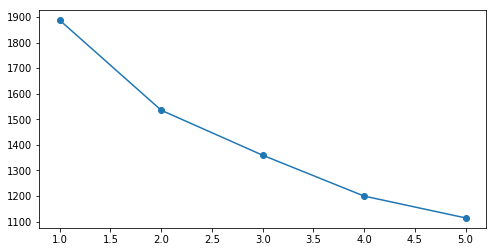

In [5]:
## looking best cluster with inertia for Kmeans first before Modeling out my SF's

cluster_range = range( 1, 6 )
cluster_errors = []

for num_clusters in cluster_range:
    sfclusters = KMeans(num_clusters)
    sfclusters.fit(sf_scaled)
    cluster_errors.append(sfclusters.inertia_)

clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors })

plt.figure(figsize=(8,4))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [6]:
# From this graph I am looking for an elbow and it seems that 3 clusters may be best for this model.

In [7]:
# Want to check how the cluster performs w/ labels, centriod, intertia and silhouette_score

def performance(data, n_clusters): 
    
    performance = cluster.KMeans(n_clusters=n_clusters, random_state=42)
    performance = performance.fit(data)
    labels = performance.labels_
    centroids = performance.cluster_centers_
    inertia = performance.inertia_
    sil_score = metrics.silhouette_score(data, performance.labels_, metric='euclidean')

    data_dictionary = {
        "labels": labels,
        "centroids": centroids,
        "inertia" : inertia,
        "silhouette_score": sil_score
    }

    return data_dictionary

In [8]:
performance(sf_scaled,3)

{'labels': array([2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2,
        2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2,
        2, 2, 0, 1, 1, 1, 0], dtype=int32),
 'centroids': array([[-5.89944469e-01, -9.50245357e-02, -5.76063433e-01,
          2.49876085e-01,  7.49935022e-02,  2.98176648e-01,
         -4.08872245e-01, -4.54637212e-01, -5.17915139e-01,
         -4.97923126e-01, -4.34109287e-01, -3.58397482e-01,
         -4.21585260e-01, -4.17594838e-01,  4.02185835e-01,
         -5.30565725e-01, -3.91733889e-01, -4.02643525e-01,
         -5.82168143e-01,  8.22893199e-03, -5.93435037e-01,
         -2.62360262e-01, -3.83889248e-01, -3.94055060e-01,
         -1.92663915e-01, -7.16656368e-01,  1.15434352e-03,
         -4.95189644e-01, -4.97868948e-01, -4.97868948e-01,
         -4.49190986e-01, -1.99346659e-01, -4.93858613e-01,
         -4.89151775e-01, -1.74864695e-01, -4.94144726e-01,
         -4.41087298e-01],
        [ 1.11733929e+00, -2.91881295e

In [9]:
def find_best_cluster(data,a,b):

    scores = []
    for i in range(a,b):
        i_clusters = performance(data, i)
        sil_score_i = i_clusters['silhouette_score']
        scores.append(sil_score_i)

    sns.set_context('poster', font_scale=1)
    plt.plot(range(a,b), scores)
    plt.title("""Measuring Silhouette Score to Find Best Cluster""")
    print ("best silhouette score:", np.max(scores))

best silhouette score: 0.17543914076907113


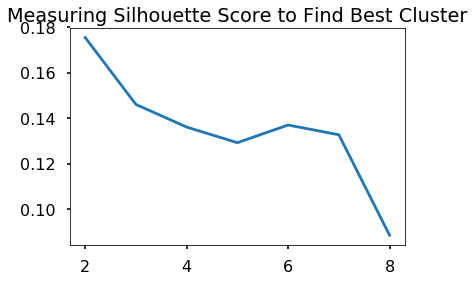

In [10]:
find_best_cluster(sf_scaled,2,9)

In [11]:
# going to go with 3 cluster.

## Picking Clustering and Modeling

In [12]:
sfk= KMeans(n_clusters=3, random_state=42)
sfk.fit(sf_scaled)
sf['sf_cluster'] = sfk.labels_
Counter(sfk.labels_)

Counter({2: 13, 0: 24, 1: 14})

In [13]:
sf[sf['sf_cluster']==1] #checking cluster 1

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,Age,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,G,GS,MP,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,Pos,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,Tm,USG%,VORP,sf_cluster
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DeMarre Carroll,4.0,0.457,8.8,3.2,0.371,8.7,3.3,10.5,31,0.7,1.0,0.2,-0.3,8.3,18.4,110,7.2,0.414,17.5,4.2,0.764,5.5,73,73,2180.0,0.4,2.3,5.1,109,14.3,3.7,21.9,SF,1.3,1.3,2.3,10.3,10.7,11.7,0.550,BRK,19.8,1.2,1
Evan Fournier,6.4,0.516,12.4,3.4,0.379,8.9,4.4,14.8,25,0.4,0.7,-0.4,-2.1,4.2,9.5,113,9.8,0.459,21.4,4.0,0.867,4.6,57,57,1837.0,1.6,0.6,1.4,110,15.5,3.7,27.0,SF,1.3,1.3,2.5,9.8,4.8,5.4,0.577,ORL,23.3,0.7,1
Paul George,5.7,0.454,12.5,4.2,0.401,10.5,4.5,14.5,27,0.7,1.2,2.6,0.0,6.4,14.9,106,9.9,0.430,23.0,5.8,0.822,7.1,79,79,2891.0,2.5,1.2,2.7,112,18.7,4.0,29.8,SF,2.8,2.8,3.6,12.2,7.7,8.6,0.570,OKC,25.7,3.3,1
Rondae Hollis-Jefferson,8.3,0.491,16.9,0.3,0.241,1.4,4.2,14.2,23,1.2,1.9,-0.4,1.1,9.1,20.0,109,8.6,0.472,18.3,6.3,0.788,8.0,68,59,1920.0,-1.5,2.6,5.5,108,16.9,3.7,23.9,SF,1.6,1.6,3.1,12.3,11.6,12.7,0.548,BRK,22.2,0.8,1
Brandon Ingram,7.7,0.483,15.9,1.0,0.390,2.5,5.6,17.7,20,1.0,1.8,-1.3,0.3,6.2,13.8,109,8.7,0.470,18.4,4.7,0.681,6.8,59,59,1975.0,-1.6,1.4,3.1,104,13.8,3.9,23.0,SF,1.1,1.1,3.6,14.4,7.6,8.5,0.536,LAL,22.2,0.4,1
Josh Jackson,8.1,0.464,17.5,1.4,0.263,5.3,2.9,10.1,20,0.9,1.4,-4.3,-1.2,6.3,14.2,112,9.5,0.417,22.8,4.3,0.634,6.8,77,35,1959.0,-3.1,2.3,5.1,93,11.8,5.3,24.7,SF,2.0,2.0,3.6,12.2,8.6,9.6,0.480,PHO,26.0,-1.1,1
Michael Kidd-Gilchrist,7.4,0.505,14.7,0.0,0.000,0.1,1.9,5.9,24,0.8,1.4,-1.8,0.3,5.7,13.0,110,7.4,0.504,14.8,3.1,0.684,4.5,74,74,1850.0,-2.0,2.2,4.8,109,12.5,3.8,18.0,SF,1.3,1.3,1.4,7.8,8.0,8.8,0.536,CHO,16.2,0.1,1
Caris LeVert,6.1,0.480,12.8,2.2,0.347,6.4,7.8,26.0,23,0.6,0.9,-0.5,-0.2,5.4,11.9,110,8.3,0.435,19.1,3.5,0.711,4.9,71,10,1864.0,-0.3,1.4,3.0,103,14.3,4.1,22.3,SF,2.1,2.1,4.0,15.8,6.8,7.4,0.525,BRK,22.5,0.7,1
Khris Middleton,7.5,0.517,14.5,2.4,0.359,6.8,5.5,17.7,26,0.4,0.6,0.4,-1.2,6.4,15.0,111,9.9,0.466,21.3,5.4,0.884,6.1,82,82,2982.0,1.6,0.8,1.8,111,17.4,4.5,27.6,SF,2.0,2.0,3.2,11.8,7.2,8.4,0.577,MIL,24.6,1.8,1


In [14]:
# double checking my model predicting for one of my players.

paul = pd.DataFrame(sf.loc['Paul George'][:43]).T.drop(columns=['Age','G','GS','MP','Pos','Tm'])
paul_scaled=ss.transform(paul)
sfk.predict(paul_scaled)

array([1], dtype=int32)

In [15]:
# checks the distance from each cluster and why it got clustered to cluster 0

for i in range(0,3):
    print('dist between evan_scaled and cluster', i, ':', distance.euclidean(paul_scaled, sfk.cluster_centers_[i]))

dist between evan_scaled and cluster 0 : 10.051177140176353
dist between evan_scaled and cluster 1 : 6.4978983900978085
dist between evan_scaled and cluster 2 : 8.086188629843319


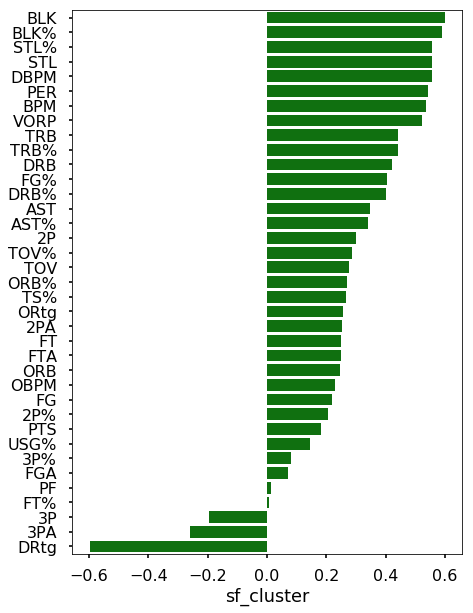

In [23]:
sf_corr = sf.drop(columns=['Age','G','GS','MP','Pos','Tm'])
corr=sf_corr.corr()
corr = corr.sort_values('sf_cluster',ascending=False)

plt.figure(figsize=(7,10))
sns.barplot(corr.sf_cluster[1:], corr.index[1:], color='g')
plt.show();

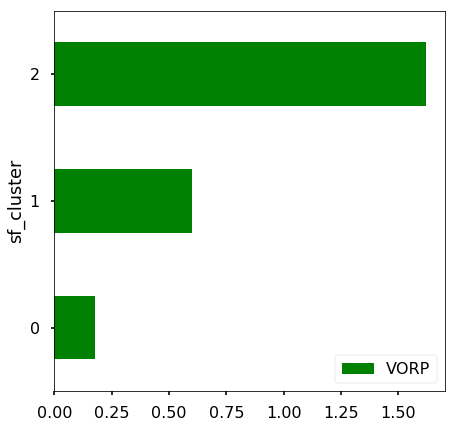

In [17]:
sf_p= sf[['VORP','sf_cluster']]
sf_p.groupby(['sf_cluster']).mean().plot(kind='barh', figsize=(7,7), color='g')

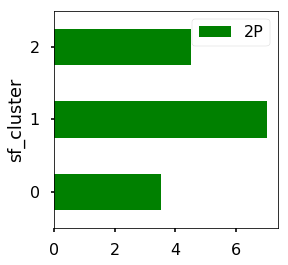

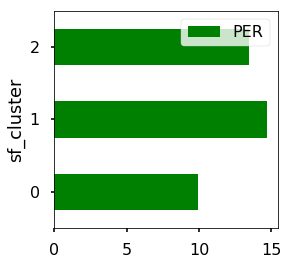

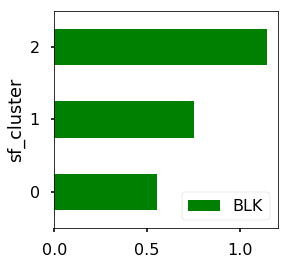

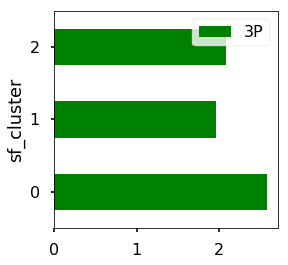

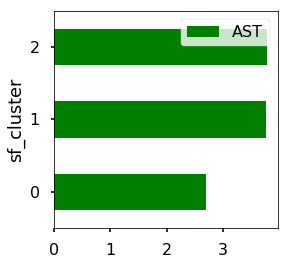

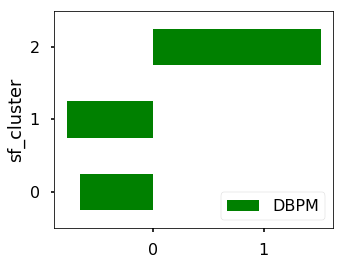

In [18]:
test1= sf[['2P','sf_cluster']]
test1.groupby(['sf_cluster']).mean().plot(kind='barh', figsize=(4,4),color='g');

test2= sf[['PER','sf_cluster']]
test2.groupby(['sf_cluster']).mean().plot(kind='barh', figsize=(4,4),color='g');

test3= sf[['BLK','sf_cluster']]
test3.groupby(['sf_cluster']).mean().plot(kind='barh', figsize=(4,4),color='g'); # DRtg seems the same

test4= sf[['3P','sf_cluster']]
test4.groupby(['sf_cluster']).mean().plot(kind='barh', figsize=(4,4),color='g');# DRtg seems the same

test5= sf[['AST','sf_cluster']]
test5.groupby(['sf_cluster']).mean().plot(kind='barh', figsize=(4,4),color='g'); # DRtg seems the same

sf_p= sf[['DBPM','sf_cluster']]
sf_p.groupby(['sf_cluster']).mean().plot(kind='barh', figsize=(5,4),color='g');

## Conclusion
SF0 strongest 3PA and 3P average STL - typical 3and D position
<br/> 3 and D(stl)- Trevor Ariza, Bojan Bogdanovic, Jae Crowder, Wesley Matthew

SF1 - Highest USG%, well rounded, AST high PER is high shoots 2P 
<br/> Well rounded 3's-DeMarre Carroll, Evan Fournier,Caris LeVert, Khris Middleton

SF2 - BLK, STL , Strong DBPM, Most Valubale
<br/> 3 and D(stl&blk)- Kyle Anderson, Corey Brewer, Robert Covington, Jayson Tatum

Value
<br/> SF2>SF1>SF0

In [19]:
trace1 = go.Scatter3d(
    x=sf['3P'],
    y=sf['STL'],
    z=sf['USG%'],
    mode='markers',
    marker=dict(
        size=12,
        color=sf['sf_cluster'],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

In [20]:
sf.to_csv('./sf_cluster_17_18')

In [21]:
# for pickle
#from sklearn.externals import joblib

#joblib.dump(sfk, './sf_kmeans.pk1')

#joblib.dump(ss, './sf_scaler.pk1')